# ECE 498 DS Mini Project 2 - Template

# Fill NetIDs Here

gowtham4, somani4, mananm2

In [1]:
# libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap as sns_heatmap
from scipy.stats import ks_2samp as ks_test
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE

from sklearn.cluster import k_means_ as Kmeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import AgglomerativeClustering as AggClustering

# Task 1: Data Cleaning and Visual Inspection

In [2]:
# Import all CSV data
bayes_inf_HE0 = pd.read_csv('BayesInferenceHE0.csv')
bayes_inf_HE1 = pd.read_csv('BayesInferenceHE1.csv')
quality = pd.read_csv('QualityControl.csv')
rel_abdnce_HE0 = pd.read_csv('RelativeAbundance_HE0.csv')
rel_abdnce_HE1 = pd.read_csv('RelativeAbundance_HE1.csv')

In [3]:
rel_abdnce_HE0

Microbe Name  HE0Sample_0  \
0    Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...     0.004239   
1              Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3     0.013269   
2    Actinobacteria_Actinobacteria_Acidimicrobiales...     0.003502   
3    Actinobacteria_Actinobacteria_Actinomycetales_...     0.003870   
4    Actinobacteria_Actinobacteria_Actinomycetales_...     0.004976   
..                                                 ...          ...   
144  Tenericutes_Mollicutes_Anaeroplasmatales_Anaer...     0.004792   
145  Tenericutes_Mollicutes_Haloplasmatales_Halopla...     0.004976   
146  Tenericutes_Mollicutes_Mycoplasmatales_Mycopla...     0.013638   
147  Thermodesulfobacteria_Thermodesulfobacteria_Th...     0.003870   
148  Verrucomicrobia_Verrucomicrobiae_Verrucomicrob...     0.005345   

     HE0Sample_1  HE0Sample_2  HE0Sample_3  HE0Sample_4  HE0Sample_5  \
0       0.004345     0.004423     0.004463     0.005372     0.004136   
1       0.012312     0.011611     0.013033     0.013689     0.012752   
2       0.005251     0.006082     0.003749     0.004332     0.004136   
3       0.005794     0.005345     0.004106     0.002946     0.003963   
4       0.003802     0.004239     0.004285     0.005198     0.004136   
..           ...          ...          ...          ...          ...   
144     0.003983     0.004976     0.004285     0.003985     0.003963   
145     0.004345     0.004792     0.007499     0.004332     0.003274   
146     0.010139     0.011611     0.010891     0.009184     0.009478   
147     0.003802     0.004423     0.003571     0.004159     0.004825   
148     0.004164     0.006450     0.006427     0.003466     0.004480   

     HE0Sample_6  HE0Sample_7  HE0Sample_8  ...  HE0Sample_754  HE0Sample_755  \
0       0.004457     0.004049     0.004638  ...       0.004464       0.004636   
1       0.009772     0.012148     0.013743  ...       0.010603       0.013565   
2       0.004972     0.004930     0.004638  ...       0.003906       0.002919   
3       0.005315     0.003697     0.005326  ...       0.005394       0.004979   
4       0.003257     0.002993     0.003264  ...       0.004092       0.003777   
..           ...          ...          ...  ...            ...            ...   
144     0.003429     0.005458     0.005154  ...       0.004464       0.005666   
145     0.004286     0.004930     0.003951  ...       0.003720       0.004636   
146     0.013544     0.014261     0.012541  ...       0.010417       0.013565   
147     0.004972     0.003345     0.004810  ...       0.005766       0.005151   
148     0.003943     0.004754     0.003608  ...       0.004092       0.005495   

     HE0Sample_756  HE0Sample_757  HE0Sample_758  HE0Sample_759  \
0         0.004046       0.005518       0.005073       0.003527   
1         0.012139       0.012875       0.013294       0.014107   
2         0.004782       0.006070       0.003498       0.004408   
3         0.004598       0.005518       0.005597       0.004761   
4         0.004782       0.004598       0.003848       0.004585   
..             ...            ...            ...            ...   
144       0.004782       0.005518       0.003848       0.005466   
145       0.006805       0.003678       0.005947       0.004585   
146       0.010116       0.011219       0.012944       0.011638   
147       0.003862       0.005334       0.004898       0.003879   
148       0.005518       0.004782       0.005248       0.003703   

     HE0Sample_760  HE0Sample_761  HE0Sample_762  HE0Sample_763  
0         0.005413       0.003140       0.002998       0.004829  
1         0.012694       0.013082       0.008244       0.010401  
2         0.004853       0.004012       0.004310       0.005758  
3         0.004293       0.005233       0.004497       0.005386  
4         0.003360       0.004186       0.004684       0.002043  
..             ...            ...            ...            ...  
144       0.005973       0.004186       0.006933       0.005386  
145       0.003547

## 0. Getting Started With the Data

### 1 They need to be sure that it is statistically significant. Hypothesis needs to be backed by data.

### 2 total number of samples = 764 + 764 = 1528

### 3 number of microbes = 149 

## 1. Bayesian Network for Quality Control

### a. Joint Probability Factorization

$$ P(Storage Temp, Collection Method, Contamination, Lab Time, Quality) $$
$$= P(Quality | Contamination, Lab Time) * P(Contamination | Storage Temp, Collection Method) * P(Storage Temp) * P(Collection Method) * P(Lab Time) $$

### b. Parameters Required

In [4]:
print('all are binary features')
print('total parameters reqd: ', (2**2) + (2**2) +(2-1)+(2-1)+(2-1))

all are binary features
total parameters reqd:  11


### c. Constructing Probability Tables

In [5]:
print(quality.head())
print('unique binary features')
[quality[i].unique() for i in quality.columns]

  strtmp   coll labtime  cont  qual
0   cold  nurse   short   low  good
1   cold  nurse   short   low  good
2   cold  nurse   short   low   bad
3   cold  nurse   short  high  good
4   cold  nurse   short   low  good
unique binary features


[array(['cold', 'cool'], dtype=object),
 array(['nurse', 'patient'], dtype=object),
 array(['short', 'long'], dtype=object),
 array(['low', 'high'], dtype=object),
 array(['good', 'bad'], dtype=object)]

In [6]:
# P(Storage Temp)

strtmp = {} 
strtmp['cold'] = sum(quality['strtmp'] == 'cold')/ len(quality)
strtmp['cool'] = 1 - strtmp['cold']
print('strtmp:', strtmp)

# P(Collection Method)

coll = {} 
coll['nurse'] = sum(quality['coll'] == 'nurse')/ len(quality)
coll['patient'] = 1 - coll['nurse']
print('coll', coll)

# P(Lab Time)
labtime = {}
labtime['short'] = sum(quality['labtime'] == 'short')/ len(quality)
labtime['long'] = 1 - labtime['short']
print('labtime', labtime,'\n\n')


## Note the following is a complicated line of operations chained on the dataframe, lots of things are happening! 

# P(Quality|Contamination, Lab Time)

qual_if_cont_labtime = quality.groupby(['cont','labtime','qual']).count().iloc[:,0].unstack(-1)
qual_if_cont_labtime = qual_if_cont_labtime.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand')
print(qual_if_cont_labtime,'\n\n')

# P(Contamination|Storage Temp, Collection Method)

cont_if_strtmp_coll = quality.groupby(['strtmp','coll','cont']).count().iloc[:,0].unstack(-1)
cont_if_strtmp_coll = cont_if_strtmp_coll.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand')
print(cont_if_strtmp_coll)



strtmp: {'cold': 0.8982, 'cool': 0.1018}
coll {'nurse': 0.8976, 'patient': 0.10240000000000005}
labtime {'short': 0.7956, 'long': 0.20440000000000003} 


qual               bad      good
cont labtime                    
high long     0.966102  0.033898
     short    0.064257  0.935743
low  long     0.080997  0.919003
     short    0.042907  0.957093 


cont                high       low
strtmp coll                       
cold   nurse    0.043983  0.956017
       patient  0.076577  0.923423
cool   nurse    0.088435  0.911565
       patient  0.838235  0.161765


### d. Final Probability Tables

In [7]:
# it turns out value_counts is simpler to use
cpt_quality = quality.groupby(['strtmp','coll','labtime'])['qual'].value_counts().unstack(-1)
cpt_quality = cpt_quality.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand').fillna(value = 0)
print(cpt_quality)

#sanity check: print(cpt_quality.apply(np.sum, axis = 1))

qual                         bad      good
strtmp coll    labtime                    
cold   nurse   long     0.112038  0.887962
               short    0.044888  0.955112
       patient long     0.137931  0.862069
               short    0.056022  0.943978
cool   nurse   long     0.177215  0.822785
               short    0.027624  0.972376
       patient long     0.882353  0.117647
               short    0.039216  0.960784


### e. Cleaning the dataset

In [8]:
def remove_bad_samples (df):
    """to clean dataset and keep only good samples"""
    df_copy = df.copy()
    df_copy['quality'] = df.apply(is_row_good, axis = 1,raw=True)
    df_good = df[df_copy['quality'] == True]
    bad_samples = df[df_copy['quality'] == False].iloc[:,0]
    return df_good, bad_samples
         
    
def is_row_good(row):
    """ called from remove_bad_samples"""
#     print(tuple(row[1:]))
    return cpt_quality.loc[tuple(row[1:])][1] >= 0.5
    
    
bayes_HE0,HE0_bad = remove_bad_samples(bayes_inf_HE0) 
bayes_HE1,HE1_bad = remove_bad_samples(bayes_inf_HE1) 
print('Quality = Good Data\n\n')
print(bayes_HE0, bayes_HE1,'\n\n\n')
print('Quality = Bad Data\n\n')
print(HE0_bad,HE1_bad)

rel_abdnce_HE0 = rel_abdnce_HE0.drop(columns = HE0_bad.values )
rel_abdnce_HE1 = rel_abdnce_HE1.drop(columns = HE1_bad.values )


Quality = Good Data


        SampleName strtmp   coll labtime
0      HE0Sample_0   cold  nurse   short
1      HE0Sample_1   cold  nurse   short
2      HE0Sample_2   cold  nurse   short
3      HE0Sample_3   cold  nurse   short
4      HE0Sample_4   cold  nurse   short
..             ...    ...    ...     ...
694  HE0Sample_694   cold  nurse    long
695  HE0Sample_695   cold  nurse    long
696  HE0Sample_696   cold  nurse    long
697  HE0Sample_697   cold  nurse    long
698  HE0Sample_698   cold  nurse    long

[699 rows x 4 columns]         SampleName strtmp   coll labtime
0      HE1Sample_0   cold  nurse   short
1      HE1Sample_1   cold  nurse   short
2      HE1Sample_2   cold  nurse   short
3      HE1Sample_3   cold  nurse   short
4      HE1Sample_4   cold  nurse   short
..             ...    ...    ...     ...
694  HE1Sample_694   cold  nurse    long
695  HE1Sample_695   cold  nurse    long
696  HE1Sample_696   cold  nurse    long
697  HE1Sample_697   cold  nurse    long
698  HE1Sam

## 2. Data Standardization

### 1. Verify Relative Abundance

In [9]:
print("{0} HE0 Data points satisfy the relative abundance constraint."\
      .format(sum((1-1e-9 <= rel_abdnce_HE0.iloc[:,1:].apply(sum)) & \
                  (rel_abdnce_HE0.iloc[:,1:].apply(sum) <= 1+1e-9) )))


print("{0} HE1 Data points satisfy the relative abundance constraint."\
      .format(sum((1-1e-9 <= rel_abdnce_HE1.iloc[:,1:].apply(sum)) & \
                  (rel_abdnce_HE1.iloc[:,1:].apply(sum) <= 1+1e-9) )))

699 HE0 Data points satisfy the relative abundance constraint.
699 HE1 Data points satisfy the relative abundance constraint.


### 2. Discussion on Relative Abundance Data

This gives us a constrained snapshot of the relative distributions of microbes in a specific sample. There is a problem in doing this, i.e. we lose the inter sample variation information. For example one sample may have abnormally high number of microbes overall which will skew the distribution.

### 3. Visual Inspection

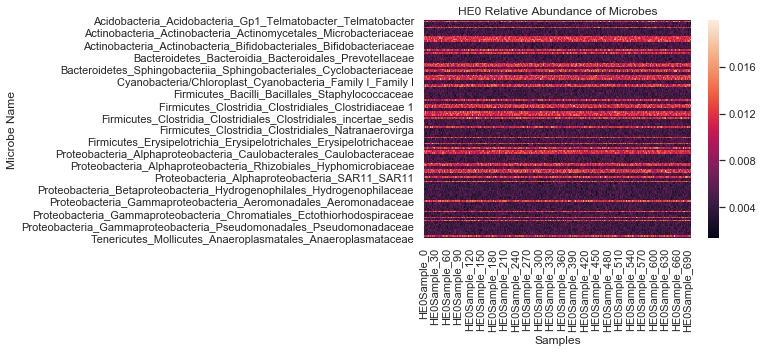

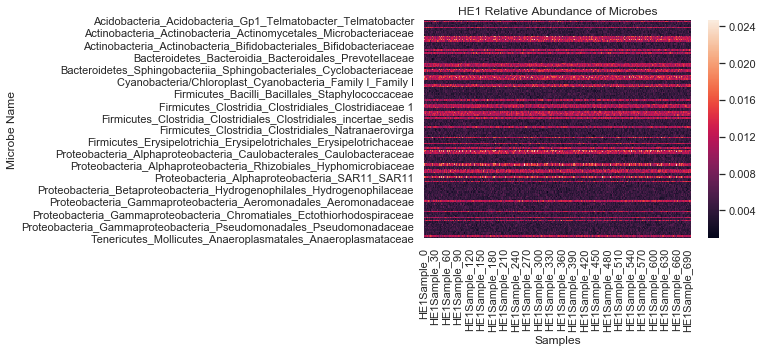

In [10]:
sns.set()
sns_heatmap(rel_abdnce_HE0.set_index('Microbe Name'))
plt.xlabel('Samples')
plt.title('HE0 Relative Abundance of Microbes')
plt.show()

#plt.savefig('HE0_rel_abundance.png', bbox_inches='tight')
sns_heatmap(rel_abdnce_HE1.set_index('Microbe Name'))
plt.xlabel('Samples')
plt.title('HE1 Relative Abundance of Microbes')
plt.show()

#plt.savefig('HE1_rel_abundance.png', bbox_inches='tight')

Concentrations of microbes across the samples is apparent

# Task 2: Statistical Analysis

## 1. Kolmogorov-Smirnov (KS) Test

### a. p-value for Two-Sample KS Test

In [14]:
def ks_test_p_value(alpha_level):
    altered = 0
    p_values = []
    for i in range(len(rel_abdnce_HE0)):
        KS_val,p = ks_test(rel_abdnce_HE0.iloc[i,1:],rel_abdnce_HE1.iloc[i,1:])
        p_values.append(p)
        if p < alpha_level:
            #print(rel_abdnce_HE0.iloc[i,0], ', Reject H0: ', 'They are altered in HE0 vs HE1')
            altered+=1       
        else:
            #print('not altered')           
            pass
    return altered,p_values

### b. Null Hypothesis of the KS Test in our Context

Null hypothesis is that both samples are drawn from same continuous distribution.

### c. Number of Genes with Significantly Altered Expression at Various Alpha Values

In [17]:
altered_ks_test = []
for a in [0.1, 0.05, 0.01, 0.005, 0.001]:
    altered, p_values= ks_test_p_value(a)
    altered_ks_test.append([a, altered])
#     plt.hist(p_values)
#     plt.axhline(y = a)
#     plt.xlabel('p-value')
#     plt.title('table for alpha')
#     plt.show()
print(altered_ks_test)

[[0.1, 50], [0.05, 37], [0.01, 27], [0.005, 26], [0.001, 21]]


## 2. Multiple Testing

### a. P-value

Critical values for distances are obtained from a D-statistic table. The D-statistic is the absolute max distance between the CDFs of the two samples. 

Calculation of P-value is done assuming H0 is true. P-value of 0.05 represents 5% probability of rejecting H0 falsely. In our context,  H0: for a microbe both HE0 and HE1 sample follow same distribution

### b. P-value Distribution

Uniform distribution. The distribution of an invertible CDF of a random variable is uniform on [0,1]
https://stats.stackexchange.com/questions/10613/why-are-p-values-uniformly-distributed-under-the-null-hypothesis

### c. Expected Number of Significant p-values

### d. Q-Q plot of p-values

#### i. 

In [19]:
expected_p_val = list(np.random.uniform(0,1,len(rel_abdnce_HE0)))
observed_p_val = p_values

#### ii. 

In [20]:
expected_log = -np.log10(expected_p_val)
observed_log = -np.log10(observed_p_val)

#### iii. 

In [21]:
expected_log.sort()
observed_log.sort()

#### iv,v,vi. 

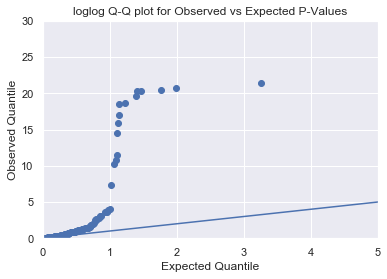

In [28]:
# combined plot
plt.scatter(expected_log,observed_log)
plt.plot(range(len(expected_log)),range(len(expected_log)))
plt.xlabel('Expected Quantile')
plt.ylabel('Observed Quantile')
plt.title('loglog Q-Q plot for Observed vs Expected P-Values')
plt.xlim([0,5])
plt.ylim([0,30])
plt.show()

### e. Follow-up Questions

#### i. 

Function -log10 blows up the p-values closer to 0. For example -log(0.001) = 3 and -log(0.01) = 2. Data above 0.1 is less emphasized. This helps us focus more on the lowe numerical values of p_value which are critical when making decision on elimination of H0

#### ii. 

Q-Q doesn't align with the x=y line hence the distributions are quite different, we can say expected and observed p-values follow different distributions. Assumption **H0 = True is probably false**. There is a difference between HE0 and HE1 samples and this difference is explained

# Task 3: Dimensionality Reduction and Clustering

## 1. PCA

### a. Performing PCA


### b. Ordering Components

### c. Scatter Plot of Microbe Abundance

## 2. t-SNE

### a. Performing t-SNE

### b. Comparing with PCA

## 3. Clustering

### a. K-Means

### b. GMM

### c. Single and Complete Linkage Hierarchical

### d. Single vs Complete Link Hierarchical Clustering

### e. Comparing Clustering Techniques

### f. What do Clusters Represent

### g. Deciding on Number of Clusters

# Task 4: Interpreting Results

## 1. Identify Microbes with Altered Abundance Levels

### a. Determine if each HE1 Subpopulation shows altered abundance levels

### b. Identify Most Similar HE0 Clusters to Affected HE1 Clusters

### c. Identify Microbes with Significantly Altered Relative Abundance

## 2. Identify How Abundance Changes

### a. Microbes which increase and decrease

### b. Biological Relations